In [1]:
#program uses an artifical recurrent neural network, Long Short Term Memory (LSTM)
##        to predict the closing stock price of a corporation using the past 60 day stock price

In [11]:
import numpy as np 
import pandas_datareader as pdr
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [12]:
## this method only works with a specific company; to interchange prices, we must download csv files separately
# the following method is better since we can replDDace without manually downloading new files
dis = pd.read_csv('DIS.csv')

In [55]:
#scrape stock data
df = pdr.DataReader('DIS', data_source = 'yahoo', start='2010-01-01', end='2020-06-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,32.750000,31.870001,32.500000,32.070000,13700400.0,27.933924
2010-01-05,32.160000,31.700001,32.070000,31.990000,10307700.0,27.864237
2010-01-06,32.000000,31.680000,31.900000,31.820000,10709500.0,27.716166
2010-01-07,31.860001,31.540001,31.770000,31.830000,8202100.0,27.724878
2010-01-08,31.940001,31.530001,31.660000,31.879999,7657500.0,27.768419
...,...,...,...,...,...,...
2020-05-26,122.510002,120.430000,121.050003,120.949997,16466400.0,120.949997
2020-05-27,123.779999,119.709999,123.680000,121.529999,19345400.0,121.529999
2020-05-28,121.980003,116.000000,121.599998,116.750000,18606000.0,116.750000


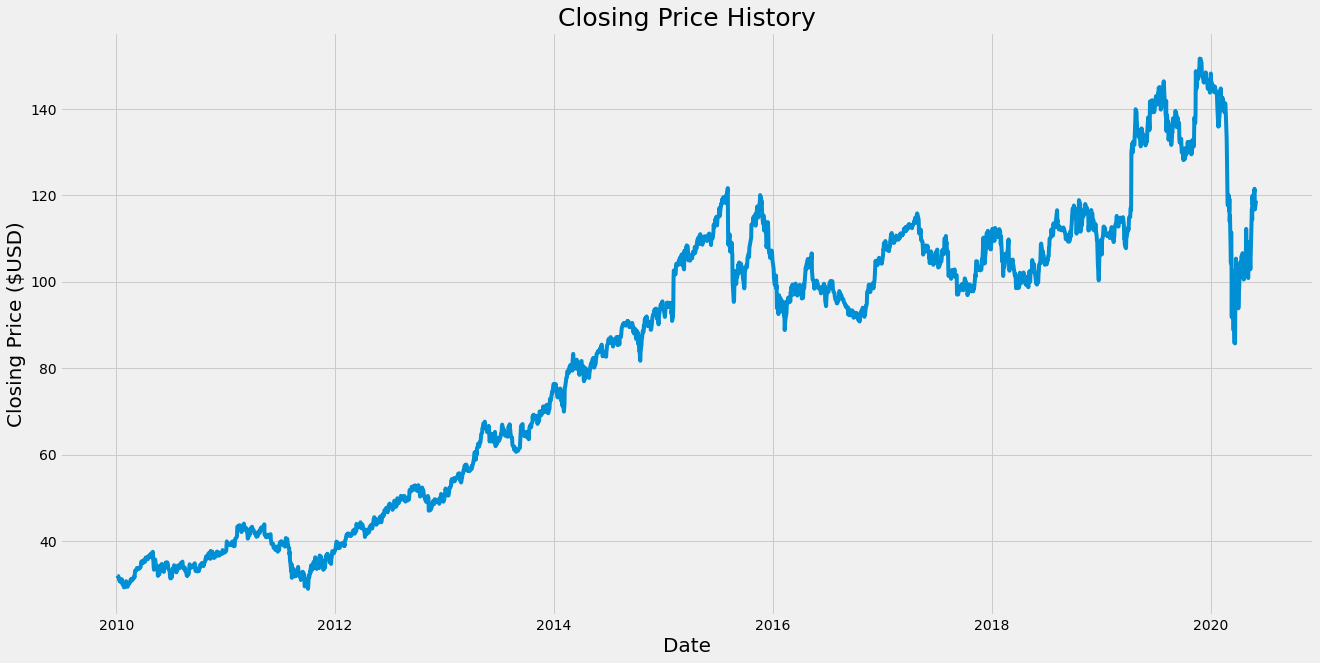

In [148]:
#figsize is always at the start
plt.figure(figsize=(20,10))
plt.plot(df.get(['Close']))
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Closing Price ($USD)', fontsize = 20)
plt.title('Closing Price History', fontsize = 25)
#plt.figure(figsize=(20,10))
plt.show()

In [162]:
math.ceil(df.get('Close').values.shape[0] * .8)

2096

In [153]:
#new df w/closing prices 
new_df = df.get(['Close'])
dataset = new_df.values
dataset
#lets take 80% of the data and attempt to predict the other 20% and compare to the actual values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2096

In [165]:
dataset

array([[ 32.06999969],
       [ 31.98999977],
       [ 31.81999969],
       ...,
       [116.75      ],
       [117.30000305],
       [118.76999664]])

In [167]:
#scaling data proportionally from 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02503261],
       [0.0243803 ],
       [0.02299413],
       ...,
       [0.71550881],
       [0.71999351],
       [0.73197975]])

In [197]:
np.arange(60, len(train_data))

array([  60,   61,   62, ..., 2093, 2094, 2095])

In [222]:
train_data

array([[0.02503261],
       [0.0243803 ],
       [0.02299413],
       ...,
       [0.57265169],
       [0.58162102],
       [0.57941942]])

In [216]:
#create training dataset
#create the scaled training data set 
#scaled_data contains 100% of the values, so lets take only 80% of the data by taking indexes from 0 to training_len
train_data = scaled_data[0:training_data_len]
#split data into x_train and y_train data sets
x_train = []
y_train = []

for i in np.arange(60, training_data_len):
    x_train.append(train_data[i-60:i,0]) #taking values from train_data from indexes 0-59
    y_train.append(train_data[i,0]) #index 60
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.02503261, 0.0243803 , 0.02299413, 0.02307567, 0.02348336,
       0.01924332, 0.01484018, 0.01867255, 0.01647098, 0.01304632,
       0.01638943, 0.01785715, 0.01312786, 0.00799086, 0.00750163,
       0.0053816 , 0.00260926, 0.00285388, 0.00448466, 0.00424006,
       0.00799086, 0.01426941, 0.00546314, 0.00440314, 0.00391389,
       0.00684932, 0.00839857, 0.00945858, 0.00872472, 0.0119863 ,
       0.01516635, 0.01647098, 0.0181833 , 0.01728637, 0.01565558,
       0.01948793, 0.01924332, 0.01826484, 0.02071103, 0.02348336,
       0.02152641, 0.02910959, 0.03440966, 0.03416502, 0.03514352,
       0.0353066 , 0.03922049, 0.038242  , 0.03848664, 0.03873125,
       0.03873125, 0.03897585, 0.03783431, 0.04036204, 0.04085126,
       0.04394977, 0.04965754, 0.05145141, 0.05022831, 0.04973906])]
[0.04818982287039178]



In [46]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [47]:
#reshape data to be 3 dimensional for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2036, 60, 1)

In [50]:
#build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [51]:
#compile model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [52]:
#train model 
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
2036/2036 [==============================] - 89s 44ms/step - loss: 0.0015


In [56]:
#create testing dataset 
#create a new array w/scaled values from index 2620 to 2036
test_data = scaled_data[training_data_len - 60: , :]
#create the data set x_test and y_test  
x_test = []
y_test = dataset[training_data_len: , :]
for i in np.arange(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [62]:
#convert data to a numpy array 
x_test = np.array(x_test)
#reshape to 3 dimesional 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [63]:
#retrieve model predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [66]:
#get root mean squared error (RMSE), test accuracy 
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.6194634473960818

<ipython-input-69-268edc086ee5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


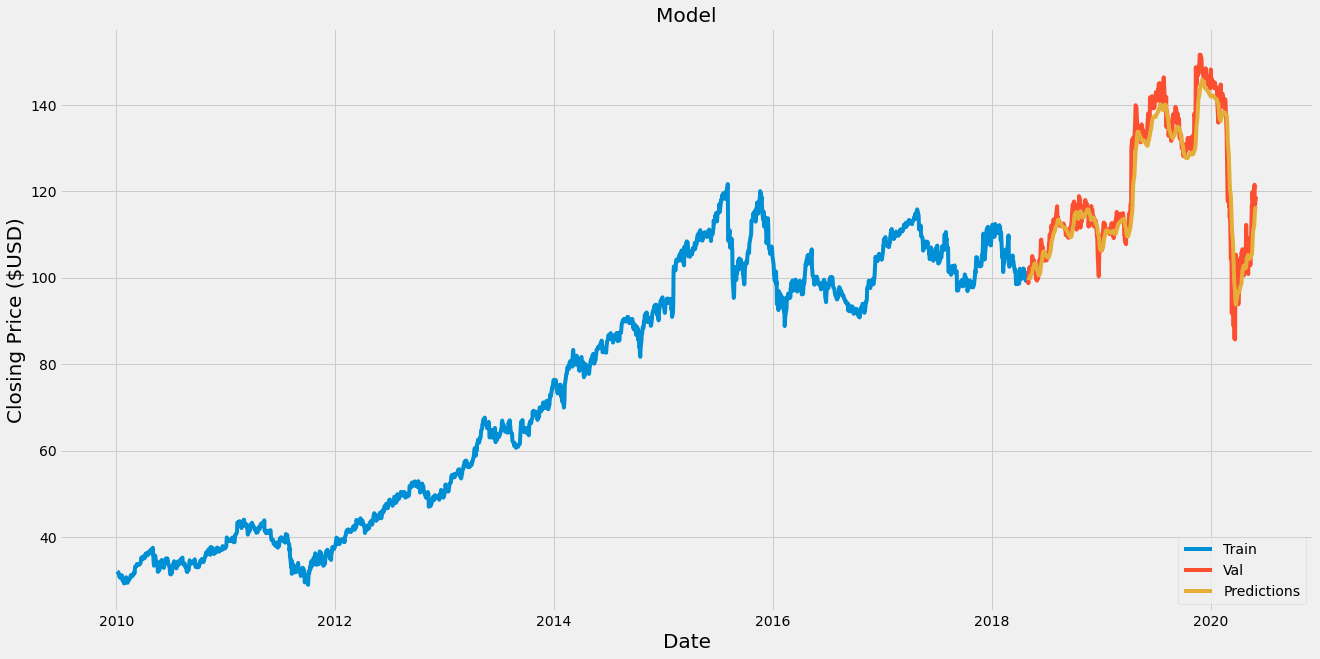

In [69]:
#plot data 
train = new_df[:training_data_len]
valid = new_df[training_data_len:]
valid['Predictions'] = predictions 
#visualize 
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Closing Price ($USD)', fontsize = 20)
plt.plot(train.get('Close'))
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [72]:
#show actual price vs predicted price
valid

,Close,Predictions
Date,,
2018-05-02,99.620003,100.140396
2018-05-03,98.760002,100.055832
2018-05-04,101.150002,99.902336
2018-05-07,102.480003,99.907440
2018-05-08,101.790001,100.104202
...,...,...
2020-05-26,120.949997,112.210228
2020-05-27,121.529999,113.680946
2020-05-28,116.750000,115.081047


In [109]:
#retrieve quote
disney_quote = web.DataReader('DIS', data_source='yahoo', start='2010-01-01', end='2020-06-11')
#new dataframe
df2 = disney_quote.get(['Close'])
#last 60 days and convert to array 
last_60 = df2[-60:].values
#scale data for values between 0 and 1
last_60_scaled = scaler.transform(last_60)
#empty list 
X_test = []
#append to list 
X_test.append(last_60_scaled)
#convert list to numpy array
X_test = np.array(X_test)-
#reshape to 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[120.849655]]


In [108]:
#actual price
disney_quote2 = web.DataReader('DIS', data_source='yahoo', start='2020-06-12', end='2020-06-12')
print(disney_quote2['Close'])

Date
2020-06-12    115.489998
2020-06-12    115.489998
Name: Close, dtype: float64


In [91]:
dis = web.DataReader('DIS', data_source='yahoo', start='2020-06-02', end='2020-06-13')
dis.get(['Close'])

,Close
Date,
2020-06-02,118.750000
2020-06-03,122.180000
2020-06-04,123.690002
2020-06-05,124.820000
2020-06-08,127.279999
2020-06-09,123.889999
2020-06-10,122.180000
2020-06-11,112.639999
2020-06-12,115.489998


In [107]:
#percent error 
def error(x , y):
    return (abs(x-y)/x)*100 